In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])

In [7]:
df.value_counts(df['Gender'])

Gender
0    5000
1    5000
dtype: int64

In [8]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [9]:
x = df.drop(['Weight'], axis=1)
y = df['Weight']

In [10]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [11]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [12]:
from sklearn.model_selection import train_test_split as tts

In [13]:
xtrain, xtest, ytrain, ytest = tts(x, y, train_size=.70, random_state=2)

# Apply Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(xtrain, ytrain)
reg_score = reg.score(xtest, ytest)
reg_score

0.9024404534795949

In [17]:
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error #MAE

In [18]:
pred = reg.predict(xtest)
mse_l = mean_squared_error(ytest , pred)
mse_l

101.74268266961374

In [19]:
pred1 = reg.predict(xtest)
mae_l = mean_absolute_error(ytest , pred1)
mae_l

8.025722298167047

pred_a = reg.predict(xtest)
mae = mean_absolute_error(ytest , pred_a)
mae

# KNN Regressor

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [21]:
knn.fit(xtrain,ytrain)
k_score = knn.score(xtest, ytest)
k_score

0.8848965454040625

In [22]:
pred_k = knn.predict(xtest)
mse_k = mean_squared_error(ytest, pred_k)
mse_k

120.03883446384575

In [23]:
pred_k1 = knn.predict(xtest)
mae_k = mean_absolute_error(ytest, pred_k1)
mae_k

8.744647319851333

In [24]:
knnr = pd.DataFrame([k_score, mse_k, mae_k],  columns=['Linear Regression'] )
knnr

,Linear Regression
0,0.884897
1,120.038834
2,8.744647


In [25]:
lrr = pd.DataFrame([reg_score, mse_l, mae_l],  columns=['KNN Regressor'] )
lrr

,KNN Regressor
0,0.902440
1,101.742683
2,8.025722


In [26]:
Algorithms = pd.DataFrame(['Score', 'Mean squared error', 'Mean absolute error'], columns=[''])
Algorithms

,
0,Score
1,Mean squared error
2,Mean absolute error


# Evaluate Model

In [27]:
table = pd.concat([Algorithms, lrr, knnr ], axis=1)
table

,,KNN Regressor,Linear Regression
0,Score,0.902440,0.884897
1,Mean squared error,101.742683,120.038834
2,Mean absolute error,8.025722,8.744647


# Randomized Search CV

In [28]:
trees1 = np.random.randint(25,200,25)
trees2 = np.random.randint(30,300,15)

In [29]:
n_neighbors= trees2
weights= ['uniform', 'distance']
algorithm = ['ball_tree', 'kd_tree', 'brute']
leaf_size= trees2
p= [1,2]

In [30]:
ids= {
    'n_neighbors':n_neighbors,
    'weights':weights,
    'algorithm':algorithm,
    'leaf_size':leaf_size,
    'p':p
}

In [31]:
print(ids)

{'n_neighbors': array([ 76,  39, 145,  42,  69, 190, 114,  74, 247, 128,  60, 214, 211,
       202, 110]), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'leaf_size': array([ 76,  39, 145,  42,  69, 190, 114,  74, 247, 128,  60, 214, 211,
       202, 110]), 'p': [1, 2]}


In [32]:
from sklearn.model_selection import RandomizedSearchCV


In [33]:
rcv= RandomizedSearchCV(knn, ids, n_iter = 200, cv=3)

In [34]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=200,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': array([ 76,  39, 145,  42,  69, 190, 114,  74, 247, 128,  60, 214, 211,
       202, 110]),
                                        'n_neighbors': array([ 76,  39, 145,  42,  69, 190, 114,  74, 247, 128,  60, 214, 211,
       202, 110]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [35]:
rcv_result = pd.DataFrame(rcv.cv_results_)
rcv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005205,0.007361,0.051206,0.003071,uniform,2,110,42,kd_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.899345,0.889502,0.902863,0.897237,0.005655,40
1,0.000000,0.000000,0.214334,0.002499,distance,1,214,114,ball_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.888965,0.879822,0.893203,0.887330,0.005584,103
2,0.003355,0.003398,0.060552,0.000088,uniform,2,128,211,kd_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.898539,0.888279,0.902733,0.896517,0.006072,54
3,0.000000,0.000000,0.295726,0.016113,distance,2,214,145,brute,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.888514,0.879423,0.893001,0.886980,0.005648,132
4,0.009442,0.000972,0.141777,0.000967,uniform,2,76,202,ball_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.900253,0.891355,0.903876,0.898495,0.005261,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.006035,0.002814,0.078105,0.003743,distance,2,190,145,kd_tree,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.888599,0.879540,0.892869,0.887003,0.005558,123
196,0.006735,0.003415,0.141518,0.006573,distance,2,128,114,ball_tree,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.888518,0.879794,0.892055,0.886789,0.005153,144
197,0.006066,0.002836,0.172316,0.007443,distance,1,39,145,brute,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.885979,0.877686,0.888361,0.884009,0.004575,194
198,0.009390,0.000970,0.063893,0.003465,uniform,2,42,39,ball_tree,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.900540,0.892444,0.904252,0.899078,0.004930,14


In [36]:
rcv.best_score_

0.8991398208548006

In [37]:
rcv.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 42,
 'leaf_size': 69,
 'algorithm': 'brute'}

In [38]:
rcv.best_estimator_

KNeighborsRegressor(algorithm='brute', leaf_size=69, n_neighbors=42, p=1)

In [39]:
knn_new = rcv.best_estimator_
knn_new

KNeighborsRegressor(algorithm='brute', leaf_size=69, n_neighbors=42, p=1)

In [40]:
knn_new.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='brute', leaf_size=69, n_neighbors=42, p=1)

In [41]:
knn_new.score(xtest, ytest)

0.8987042261427017

In [42]:
k_score_new = knn_new.score(xtest, ytest)
pred_k = knn_new.predict(xtest)
mse_k_new = mean_squared_error(ytest, pred_k)
pred_k1 = knn_new.predict(xtest)
mae_k_new = mean_absolute_error(ytest, pred_k1)
knnr_new = pd.DataFrame([k_score_new, mse_k_new, mae_k_new],  columns=['Randomized Search CV'] )

# Compare with Old KNN model and Linear regression

In [43]:
table_new = pd.concat([Algorithms, lrr, knnr, knnr_new ], axis=1)
table_new

,,KNN Regressor,Linear Regression,Randomized Search CV
0,Score,0.902440,0.884897,0.898704
1,Mean squared error,101.742683,120.038834,105.639111
2,Mean absolute error,8.025722,8.744647,8.181778


# KNN Classifier

In [44]:
wh = pd.read_csv('weight-height.csv')

In [45]:
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [46]:
wh['Gender'] = lb.fit_transform(wh['Gender'])

In [47]:
wh

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [48]:
xx = wh.drop('Gender', axis=1)
yy = wh['Gender']

In [49]:
xx.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [50]:
yy.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [51]:
xxtrain, xxtest, yytrain, yytest = tts(xx, yy, test_size=0.30, random_state=3)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=9)

In [53]:
knn_clf.fit(xxtrain, yytrain)

KNeighborsClassifier(n_neighbors=9)

In [54]:
knn_clf.score(xxtest, yytest)

0.914

# Confusion matrix, ROC curve, AUC

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [56]:
pred_new = knn_clf.predict(xxtest)

In [57]:
print(classification_report(yytest, pred_new))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1507
           1       0.92      0.91      0.91      1493

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



In [58]:
confusion_matrix(yytest,pred_new)


array([[1381,  126],
       [ 132, 1361]], dtype=int64)

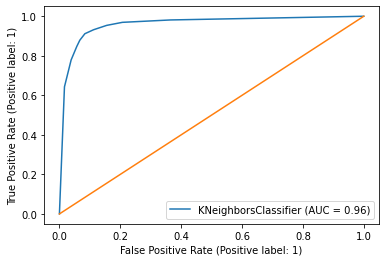

In [59]:
import matplotlib.pyplot as plt
plot_roc_curve(knn_clf, xxtest, yytest)
plt.plot([0,1],[0,1])